In [ ]:
## 대표적인 이산형 확률 분포

- 베르누이분포=>이항분포

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline


'%.3f'

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [7]:
# 필요 함수 정의

# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 기댓값과 분산 계산 함수

# x가 이산형 확률 변수 인지 확인
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
# (assert 구문은 if 구문과 비슷)    
# 그래프 작성 함수

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


### 베르누이 분포
- 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포

    - 베르누이 분포를 따르는 확률변수의 시행이 베르누이 시행
    - 1은 성공, 0은 실패
    - 1이 나오는 확률 p , 0이 나오는 확률 1-p
    - 파라미터 p인 베르누이 분포는 Bern(p)
    

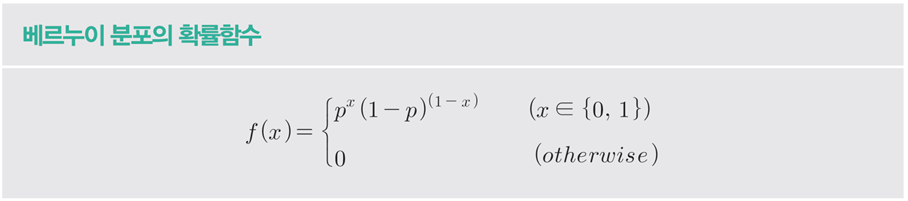

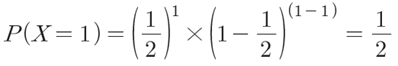

In [ ]:
# 주사위 확률

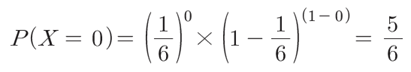

#### 베르누이 분포를 함수로 구성

In [11]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else :
            return 0
        
    return x_set, f
            

In [14]:
p=0.3 #1 나올 확률

x= Bern(p)

In [15]:
print(x)

(array([0, 1]), <function Bern.<locals>.f at 0x0000000005A9B940>)


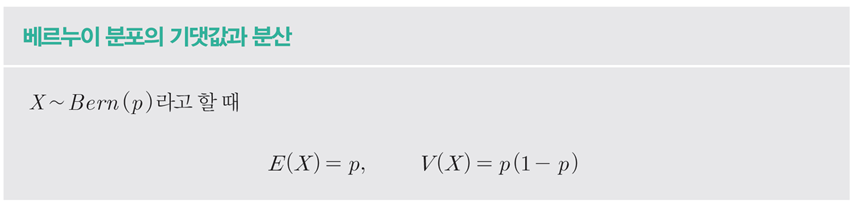

In [16]:
# 기대값과 분산

check_prob(x)

expected value 0.3
variance 0.21


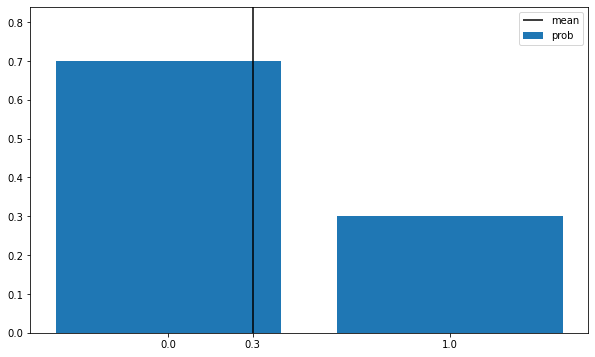

In [19]:
# 기대값과 확률의 관계

plot_prob(x)


# scipy.stats 모듈
- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지

    - SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공


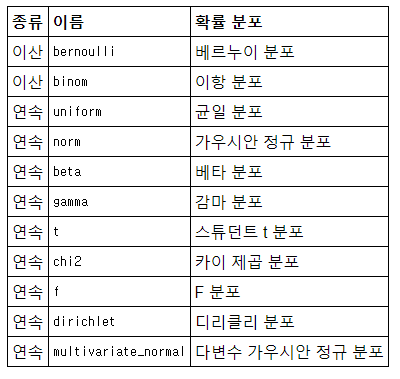

In [23]:
p=0.3
# 인수로 확률 파라미터를 취하고 베르누이 분포를 따르는 object를 반환함
# 반환 object가 저장된 변수 rv는 확률변수에 해당 함
rv=stats.bernoulli(p)

In [25]:
# pmf메스드: 확률 질량 함수
rv.pmf(0)
rv.pmf(1)

# 인수를 리스트로 넘길 수 있음
rv.pmf([0,1])

0.7000000000000001

0.3

array([0.7, 0.3])

In [26]:
# cdf 누적 분포 함수
rv.cdf([0,1])

array([0.7, 1. ])

In [27]:
# 기대값과 분산 계산
rv.mean()
rv.var()

0.3

0.21

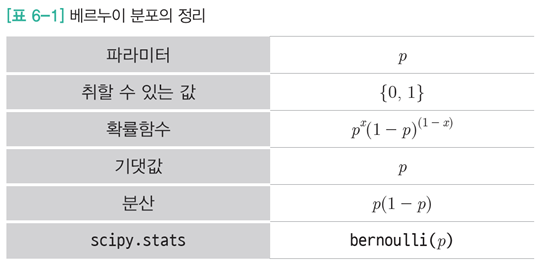

### 이항분포
- 성공 확률이 μ 인 베르누이 시행을 N번 반복하는 경우
    - 가장 운이 좋을 때는 N번 모두 성공할 것이고, 운이 나쁜 경우에는 한번도 성공하지 못할 것
    - N번 시행 중 성공한 횟수를 확률변수 X라고 한다면 X의 값을 0부터 N가지의 정수 중 하나가 됨

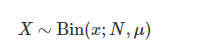

- X= 성공의 확률이 p인 베르누이 시행을 n번 반복할 때 성공의 수가 따르는 분포

- 𝑋가 가질 수 있는 값: 0, 1, 2, …, 𝑛
    - n번 던져서 x번 성공할 확률


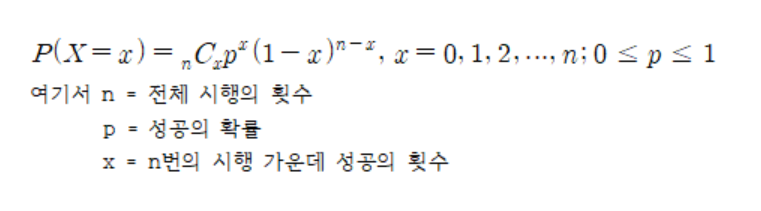

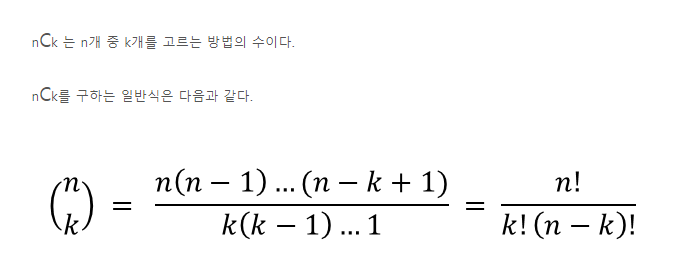

#### 위 연산을 실행하는 함수:comb

In [30]:
from scipy.special import comb
com=comb(5,2)
com


10.0

In [31]:
(5*4*3*2*1)/(2*1*(3*2*1))


10.000

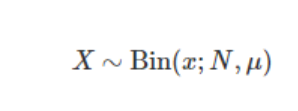

In [36]:
### 이항 분포를 따르는 확률변수를 반환하는 함수


from scipy.special import comb

def Bin(n,p):
    x_set=np.arange(n+1)
    def f(x):
        if x in x_set:
            return com(n,x)*p**x*(1-p)**(n-x)
        
        else:
            return 0
        
    return x_set, f

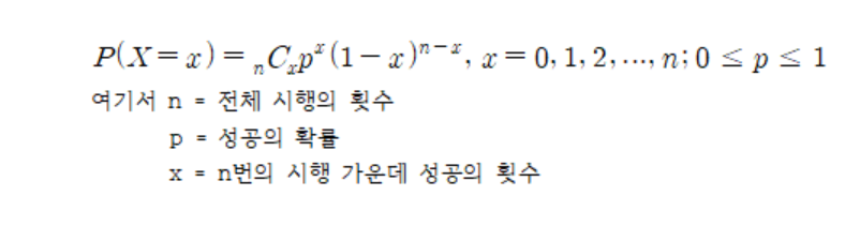

In [37]:
n=10
p=0.3

x=Bin(n,p)


In [38]:
x

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [41]:
check_prob(x)

TypeError: 'numpy.float64' object is not callable

In [44]:
x_set, f = x
x_set
f


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<function __main__.Bin.<locals>.f(x)>

In [45]:
np.array([f(x_k)  for x_k in x_set])

TypeError: 'numpy.float64' object is not callable

In [47]:
def plot_prob(x):
    x_set, f= x
    prob =np.array([f(x_k)  for x_k in x_set])

In [49]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()



In [50]:
plot_prob(x)

TypeError: 'numpy.float64' object is not callable

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


linestyles = ['-', '--', ':']
linestyles = ['-', '--', ':']


ax.set_xticks(x_set)
ax.legend()
ax.set_xticks(x_set)
ax.legend()

plt.show()

plt.show()


### 파이썬 scipy 모듈의 stats.binom 함수 사용하여 이항확률변수 생성

- stats.binom(시행횟수, 성공확률)### 파이썬 scipy 모듈의 stats.binom 함수 사용하여 이항확률변수 생성

- stats.binom(시행횟수, 성공확률)



plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()


### rvs함수

- binom.rvs 함수는 이항분포로 부터 난수를 생성시킴

- 인자: n, p, size, random_state


import seaborn as sns
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()



- 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다.


-  예.
    - 119 구조대에 걸려오는 시간 당 전화 횟수
    - 1년 동안 발생하는 진도 4 이상의 지진 횟수
    - 프러시아 기병 중에서 매년 말에 차여 사망하는 병사의 수
    - 한 야구경기에서 실책의 수
    - 서울지역의 5월 중 부도를 낸 중소기업 수


In [ ]:
-+

In [ ]:
def Poi(lam) :
    x_set = np.arange(20)
    def f(x) :
        if x in x_set :
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else : 
            return 0
    return x_set, f
